In [1]:
from operator import itemgetter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style
from sklearn import metrics
from sklearn.model_selection import train_test_split

from regression import normalEquation, logisticCost, linear, extendMatrix, logisticGradient
from statistics import normalizeFeature, sigmoid

style.use('fivethirtyeight')


In [2]:

df = pd.read_csv('datasets/breast_cancer.csv', header=None).sample(frac=1)
#
X = np.array(df.drop(columns=9, axis=1).T)
y = np.array(df.loc[:, 9])

# Remap the values to within the set [0,1].
y = [[0, 0, 0, 1, 1, 1][y_] for y_ in y]

# Normalized the values.
NormRandX = np.array(normalizeFeature(X))


In [3]:


def run(x_train, x_test, y_train, y_test):
    # Linear logistic function.
    Xe = extendMatrix(x_train, False, True)
    # Get the shape of the beta.
    linearBeta = normalEquation(Xe, y_train)

    alphaSet = [0.9, 0.5, 0.1, 0.05, 0.01, 0.005]
    alphaC = ['r', 'g', 'b', 'y', 'c', 'k']
    costs = []
    for i, alpha in enumerate(alphaSet):
        lineX = []
        lineY = []
        for n in range(1, 2000, 100):
            optimized = logisticGradient(Xe, linearBeta, y_train, alpha, n)
            combinationCost = logisticCost(Xe, optimized, y_train, linear)

            lineX.append(float(n))
            lineY.append(combinationCost)
            costs.append([combinationCost, optimized])
            print("alpha {}, iterations: {} J(B) : {}".format(
                alpha, n, round(combinationCost, 7)))

        plt.plot(lineX, lineY, color=alphaC[i], label="{}".format(alpha))
        plt.xlabel("iterations")
        plt.ylabel("cost")
        plt.legend(loc='upper left')
        plt.title("Cost in respect to number of iterations".format(alpha))
        plt.suptitle("breast_cancer.csv")
        plt.ylim(min(lineY) - 0.5, max(lineY) + 0.5)
    plt.show()

    # Determine the best theta.
    sortedCost = sorted(costs, key=itemgetter(0))
    cost, beta = sortedCost[0]
    print("The best beta {}, cost = {}".format(beta.tolist(), cost))

    threshold = 0.5
    accuracy = 0
    predictions = []
    for _x, _y in zip(x_test, y_test):
        p = sigmoid(linear(beta, _x))

        if p > threshold:
            p = 1
        else:
            p = 0
        predictions.append(p)
        if p == _y:
            accuracy = accuracy + 1

    cm = metrics.confusion_matrix(y_test, predictions)
    print(cm)
    # print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, predictions))
    print("Recall:", metrics.recall_score(y_test, predictions))

    # Compute the accuracy
    accuracyRate = accuracy / len(y_test)
    print("Accuracy: ", accuracyRate)


No Shuffle
alpha 0.9, iterations: 1 J(B) : 0.110331
alpha 0.9, iterations: 101 J(B) : 0.0713454
alpha 0.9, iterations: 201 J(B) : 0.0685721
alpha 0.9, iterations: 301 J(B) : 0.0680772
alpha 0.9, iterations: 401 J(B) : 0.0678931
alpha 0.9, iterations: 501 J(B) : 0.0678054
alpha 0.9, iterations: 601 J(B) : 0.0677565
alpha 0.9, iterations: 701 J(B) : 0.0677256
alpha 0.9, iterations: 801 J(B) : 0.0677044
alpha 0.9, iterations: 901 J(B) : 0.067689
alpha 0.9, iterations: 1001 J(B) : 0.0676775
alpha 0.9, iterations: 1101 J(B) : 0.0676687
alpha 0.9, iterations: 1201 J(B) : 0.067662
alpha 0.9, iterations: 1301 J(B) : 0.0676568
alpha 0.9, iterations: 1401 J(B) : 0.0676529
alpha 0.9, iterations: 1501 J(B) : 0.0676498
alpha 0.9, iterations: 1601 J(B) : 0.0676474
alpha 0.9, iterations: 1701 J(B) : 0.0676455
alpha 0.9, iterations: 1801 J(B) : 0.0676441
alpha 0.9, iterations: 1901 J(B) : 0.067643
alpha 0.5, iterations: 1 J(B) : 0.1108958
alpha 0.5, iterations: 101 J(B) : 0.0780697
alpha 0.5, iteratio

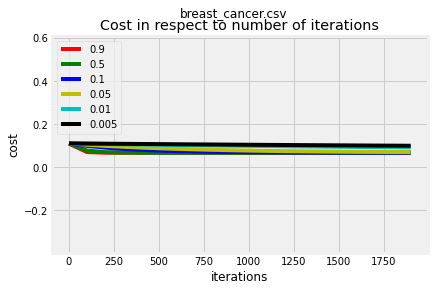

The best beta [-0.8296356386812855, 1.0849785685048459, 0.5669857642320804, 1.5118351435073996, 0.744105059459973, -0.3529391071985689, 1.7735905662461395, 0.5538039270954274, 0.990211677249613, 1.0827153227966684], cost = 0.06764301562547141
[[91  3]
 [ 3 40]]
Precision: 0.9302325581395349
Recall: 0.9302325581395349
Accuracy:  0.9562043795620438
Shuffle
alpha 0.9, iterations: 1 J(B) : 0.1050261
alpha 0.9, iterations: 101 J(B) : 0.0716553
alpha 0.9, iterations: 201 J(B) : 0.0687425
alpha 0.9, iterations: 301 J(B) : 0.0680809
alpha 0.9, iterations: 401 J(B) : 0.067702
alpha 0.9, iterations: 501 J(B) : 0.067441
alpha 0.9, iterations: 601 J(B) : 0.067253
alpha 0.9, iterations: 701 J(B) : 0.0671155
alpha 0.9, iterations: 801 J(B) : 0.0670144
alpha 0.9, iterations: 901 J(B) : 0.0669398
alpha 0.9, iterations: 1001 J(B) : 0.0668849
alpha 0.9, iterations: 1101 J(B) : 0.0668445
alpha 0.9, iterations: 1201 J(B) : 0.0668149
alpha 0.9, iterations: 1301 J(B) : 0.0667931
alpha 0.9, iterations: 1401 

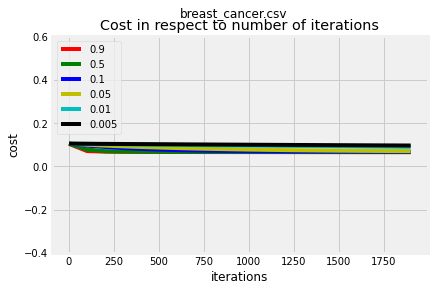

The best beta [-1.1129276429523618, 1.2817271887281971, -0.32786380290617756, 2.0060688808360734, 0.6819790270980645, 0.3588502712639293, 1.091411375735855, 0.7350751871738929, 1.0351073115153722, 0.9742892790307606], cost = 0.06674283032951865
[[94  4]
 [ 4 35]]
Precision: 0.8974358974358975
Recall: 0.8974358974358975
Accuracy:  0.9416058394160584


In [4]:

print("No Shuffle")
x_train, x_test, y_train, y_test = train_test_split(
    NormRandX.T, y, test_size=0.20, shuffle=False)
run(x_train.T, x_test, y_train, y_test)

print("Shuffle")
x_train, x_test, y_train, y_test = train_test_split(
    NormRandX.T, y, test_size=0.20, shuffle=True)
run(x_train.T, x_test, y_train, y_test)
